In [1]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az

import matplotlib.pyplot as plt
import seaborn as sns

from src.diffusivity import within_ellipsoid
from src.plots import (
    make_quantile_contour_plot, 
    make_basic_diffusivity_plot,
    make_stage_plot)
    
from src.diffusivity import (
    calculate_linear_bayesian_diffusivities, 
    calculate_non_linear_bayesian_diffusivities 
)

In [2]:
# set parameters
params = {
    'plausible_ellipsoid_lwh': [1000, 400, 600],
    'onstrike_angle_deg': 50,
    'min_pts': 5,
    'k_mu': 100,
    'k_sigma': 50,
    'po_mu': 7,
    'po_sigma': 1,
    'do_x_mu': 2,
    'do_x_sigma': 1.5,
    'do_y_mu': 0.5,
    'do_y_sigma': 0.375,
    'do_z_mu': 1,
    'do_z_sigma': 0.75,
    'nuts_target_accept': 0.85,
    'total_draws': 10000,
    'burn_in': 500,
    'n_chains': 4
}

In [3]:
# read the distances
distances = pd.read_csv('data/ms_stage_distances.csv')

In [4]:
# run the plausible ellipsoid filter
distances["in_frac_ellipsoid"] = within_ellipsoid(
    distances[["dx_strike_m", "dy_strike_m", "dz_strike_m"]].to_numpy(),
    ellipsoid_rxryrz=params['plausible_ellipsoid_lwh']
)

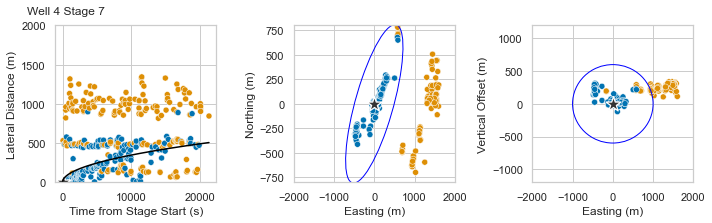

In [8]:
# run our three case studies
# standard stage: well = 1, stage = 14
# sparse data stage: well = 3, stage = 72"
# high induced seismicity: well = 4, stage = 7
well = 4
stage = 7
if well is None or stage is None:
    print('run_all')

make_stage_plot(distances, params, well=well, stage=stage, Do=2)
dist_grp = distances.query('in_frac_ellipsoid').groupby(["WellID","Stage"]).get_group((well,stage))

In [7]:
calculate_linear_bayesian_diffusivities(dist_grp, params)

Sequential sampling (4 chains in 1 job)
NUTS: [Do_x, Do_y, Do_z]


Sampling 4 chains for 500 tune and 2_500 draw iterations (2_000 + 10_000 draws total) took 47 seconds.


True

In [13]:
calculate_non_linear_bayesian_diffusivities(dist_grp, params)

Sequential sampling (4 chains in 1 job)
NUTS: [k, Po, Do_x, Do_y, Do_z]


Sampling 4 chains for 500 tune and 2_500 draw iterations (2_000 + 10_000 draws total) took 2548 seconds.


True